# 06_Implementacion_Modelo

In [6]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [1]:
# Instalar paquetes necesarios (ejecutar solo una vez)
!pip install pandas numpy matplotlib statsmodels pmdarima prophet scikit-learn

  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached prophet-1.1.7-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached cython-3.1.2-cp312-cp312-win_amd64.whl.metadata (6.0 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.74-py3-none-any.whl.metadata (39 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl (625 kB)
Using cached prophet-1.1.7-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
Using cached cython-3.1.2-cp312-cp312-win_amd64.whl (2.7 MB)
Using 

In [2]:
!pip install seaborn


In [3]:
!pip install pmdarima --upgrade

In [ ]:

# Importar biblitecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,
import warnings
warnings.filterwarnings('ignore')


c:\Users\seba0\.conda\envs\entorno_pandas\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [33]:
# Cargar los datos
file_path = '../Data/combinado_final.xlsx'  # Ajusta la ruta según sea necesario
df = pd.read_excel(file_path)

# Mostrar información básica
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

Primeras filas del dataset:


,Mercado,Precio,Fecha,Producto,Año_Mes
0,Bogotá,2200.0,2005-07-15,Aguacate Papelillo,2005-07
1,Bogotá,2340.0,2005-07-22,Aguacate Papelillo,2005-07
2,Bogotá,2355.0,2005-07-29,Aguacate Papelillo,2005-07
3,Bogotá,2410.0,2005-08-05,Aguacate Papelillo,2005-08
4,Bogotá,2410.0,2005-08-12,Aguacate Papelillo,2005-08



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160488 entries, 0 to 160487
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Mercado   160488 non-null  object        
 1   Precio    160488 non-null  float64       
 2   Fecha     160488 non-null  datetime64[ns]
 3   Producto  160488 non-null  object        
 4   Año_Mes   160488 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.1+ MB
None

Estadísticas descriptivas:


,Precio,Fecha
count,160488.000000,160488
mean,2150.347937,2013-07-13 00:04:46.944817920
min,44.000000,1997-01-30 00:00:00
25%,942.000000,2007-07-27 00:00:00
50%,1683.330000,2014-04-26 00:00:00
75%,2880.000000,2020-01-11 00:00:00
max,35400.000000,2025-06-05 00:00:00
std,1748.132993,NaN


In [ ]:
# 1. Obtener la lista de Mercados únicos
Mercados = df['Mercado'].unique()

# 2. Diccionario para almacenar los DataFrames
dataframes_por_Mercado = {}

# 3. Crear un DataFrame para cada Mercado
for Mercado in Mercados:
    # Filtrar el DataFrame original para obtener solo los datos del Mercado actual
    df_Mercado = df[df['Mercado'] == Mercado].copy()
    
    # Almacenar el DataFrame en el diccionario
    dataframes_por_Mercado[Mercado] = df_Mercado
    
    # Mostrar información del DataFrame
    print(f"\n{'='*50}")
    print(f"DataFrame para el Mercado: {Mercado}")
    print(f"Número de registros: {len(df_Mercado)}")
    df_Mercado.info()

# 4. Acceder a los DataFrames individuales
# Por ejemplo, para acceder al DataFrame de Bogotá:
# df_bogota = dataframes_por_Mercado['Bogotá']


DataFrame para el mercado: Bogotá
Número de registros: 52006
<class 'pandas.core.frame.DataFrame'>
Index: 52006 entries, 0 to 159431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Mercado   52006 non-null  object        
 1   Precio    52006 non-null  float64       
 2   Fecha     52006 non-null  datetime64[ns]
 3   Producto  52006 non-null  object        
 4   Año_Mes   52006 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.4+ MB

DataFrame para el mercado: Tunja
Número de registros: 47217
<class 'pandas.core.frame.DataFrame'>
Index: 47217 entries, 90 to 159432
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Mercado   47217 non-null  object        
 1   Precio    47217 non-null  float64       
 2   Fecha     47217 non-null  datetime64[ns]
 3   Producto  47217 non-null  object        

In [78]:
import pandas as pd

# Asegurar formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# 1. Filtrar Mercado objetivo
df_sogamoso = df[df['Mercado'] == 'Sogamoso'][['Fecha', 'Producto', 'Precio']].copy()
df_sogamoso = df_sogamoso.rename(columns={'Precio': 'Precio_Sogamoso'})

# 2. Inicializar base de unión
df_completo = df_sogamoso.copy()

# 3. Definir Mercados que quieres cruzar
otros_Mercados = ['Tunja', 'Duitama', 'Bogotá']  # ajusta según tus datos

# 4. Agregar Precios de los otros Mercados
for Mercado in otros_Mercados:
    df_otro = df[df['Mercado'] == Mercado][['Fecha', 'Producto', 'Precio']].copy()
    df_otro = df_otro.rename(columns={'Precio': f'Precio_{Mercado}'})
    
    df_completo = pd.merge(
        df_completo,
        df_otro,
        on=['Fecha', 'Producto'],
        how='left'  # o 'inner' si solo quieres las Fechas/Productos con datos en todos los Mercados
    )

# 5. Ver resultado
df_completo.head()



,Fecha,Producto,Precio_Sogamoso,Precio_Tunja,Precio_Duitama,Precio_Bogotá
0,2010-11-19,Aguacate Papelillo,4000.0,NaN,NaN,4261.67
1,2010-11-26,Aguacate Papelillo,4000.0,NaN,NaN,4155.00
2,2010-12-03,Aguacate Papelillo,4000.0,NaN,NaN,4323.33
3,2010-12-10,Aguacate Papelillo,4000.0,NaN,NaN,4435.83
4,2010-12-17,Aguacate Papelillo,4000.0,NaN,NaN,4615.00


In [80]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame llamado df
columnas_precios = ['Precio_Sogamoso', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá']

# Agregar la columna del promedio por día ignorando NaNs
df_completo['Promedio_Mercados'] = df_completo[columnas_precios].mean(axis=1, skipna=True)


In [83]:

# Lista de columnas con posibles NaN que quieres rellenar
columnas_precios = ['Precio_Sogamoso', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá']

# Rellenar NaNs en cada columna con el valor de la columna Promedio_Mercados de esa fila
for col in columnas_precios:
    df_completo[col] = df_completo[col].fillna(df_completo['Promedio_Mercados'])


In [84]:
df_completo.head()

,Fecha,Producto,Precio_Sogamoso,Precio_Tunja,Precio_Duitama,Precio_Bogotá,Promedio_Mercados
0,2010-11-19,Aguacate Papelillo,4000.0,4130.835,4130.835,4261.67,4130.835
1,2010-11-26,Aguacate Papelillo,4000.0,4077.500,4077.500,4155.00,4077.500
2,2010-12-03,Aguacate Papelillo,4000.0,4161.665,4161.665,4323.33,4161.665
3,2010-12-10,Aguacate Papelillo,4000.0,4217.915,4217.915,4435.83,4217.915
4,2010-12-17,Aguacate Papelillo,4000.0,4307.500,4307.500,4615.00,4307.500


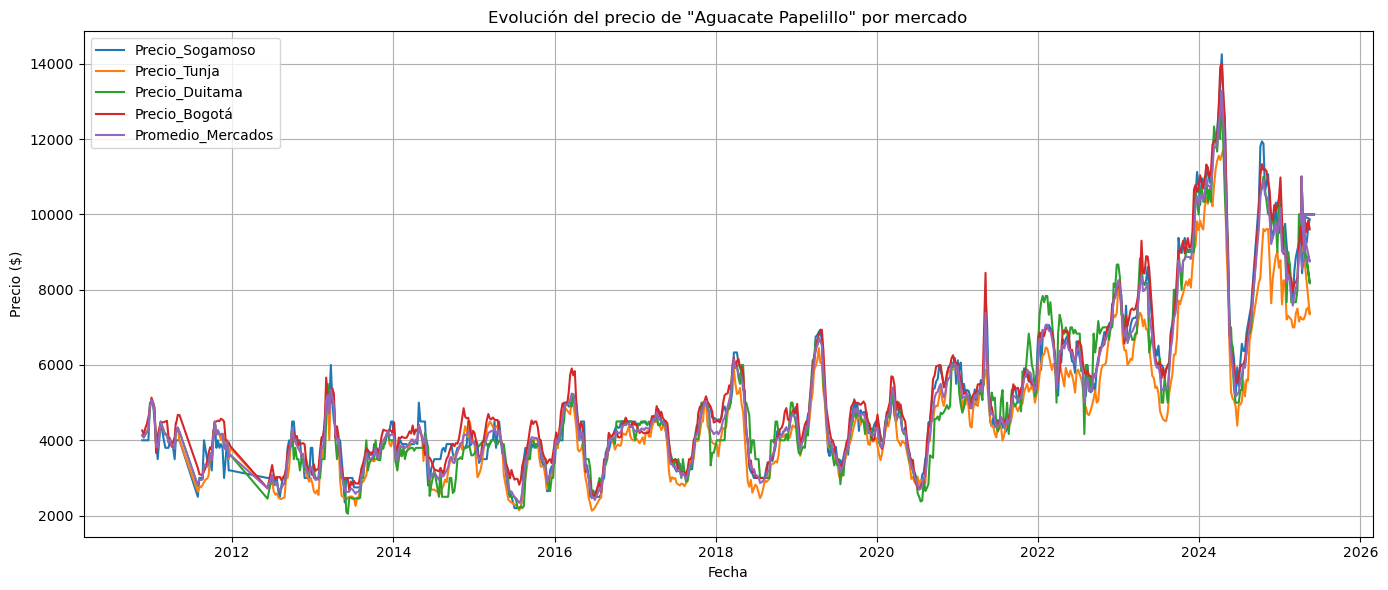

In [87]:
import matplotlib.pyplot as plt

# Lista de mercados
mercados = ['Precio_Sogamoso', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá','Promedio_Mercados']

# Elegimos un producto para visualizar, por ejemplo: Aguacate Papelillo
producto_objetivo = 'Aguacate Papelillo'

# Filtrar el DataFrame solo para ese producto
df_producto = df_completo[df_completo['Producto'] == producto_objetivo]

# Crear gráfica
plt.figure(figsize=(14, 6))

# Dibujar cada mercado
for mercado in mercados:
    plt.plot(df_producto['Fecha'], df_producto[mercado], label=mercado)

# Personalización
plt.title(f'Evolución del precio de "{producto_objetivo}" por mercado')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
import pandas as pd
from prophet import Prophet

# Seleccionar el producto 'Ajo'
df_ajo = df_completo[df_completo['Producto'] == 'Ajo'].copy()

# Calcular columna de promedio de mercados (si no existe)
columnas_mercado = ['Precio_Sogamoso', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá']

df_ajo = df_ajo.rename(columns={'Fecha': 'ds', 'Precio_Sogamoso': 'y'})

# Filtrar solo las columnas necesarias y eliminar filas con NaNs
df_ajo = df_ajo[['ds', 'y', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá', 'Promedio_Mercados']].dropna()

# Crear modelo Prophet
model = Prophet()

# Agregar regresores adicionales
model.add_regressor('Precio_Tunja')
model.add_regressor('Precio_Duitama')
model.add_regressor('Precio_Bogotá')
model.add_regressor('Promedio_Mercados')

# Entrenar el modelo
model.fit(df_ajo)

# Crear DataFrame para predicción: en este caso, se usa el mismo conjunto
future = df_ajo[['ds', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá', 'Promedio_Mercados']].copy()

# Hacer la predicción
forecast = model.predict(future)

# Visualizar la predicción
model.plot(forecast);


17:57:06 - cmdstanpy - INFO - Chain [1] start processing
17:57:06 - cmdstanpy - INFO - Chain [1] done processing
17:57:06 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
17:57:06 - cmdstanpy - INFO - Chain [1] start processing
17:57:06 - cmdstanpy - INFO - Chain [1] done processing
17:57:06 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\seba0\.conda\envs\entorno_pandas\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=96202 data file=C:\Users\seba0\AppData\Local\Temp\tmp6dh_qs9w\tkmyizk2.json init=C:\Users\seba0\AppData\Local\Temp\tmp6dh_qs9w\zfv31cfc.json output file=C:\Users\seba0\AppData\Local\Temp\tmp6dh_qs9w\prophet_modelio7pc930\prophet_model-20250614175706.csv method=optimize algorithm=newton iter=10000' failed: 

In [95]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con fechas y precios ficticios
data = {
    'ds': pd.date_range(start='2023-01-01', periods=20, freq='W'),
    'y': [
        1000, 1025, 1010, 1030, 1050,
        1065, 1075, 1090, 1100, 1110,
        1130, 1145, 1160, 1170, 1190,
        1205, 1220, 1235, 1250, 1265
    ]
}

df = pd.DataFrame(data)

# Crear el modelo
model = Prophet()

# Entrenar el modelo
model.fit(df)

# Crear un DataFrame para 10 semanas futuras
future = model.make_future_dataframe(periods=10, freq='W')

# Hacer la predicción
forecast = model.predict(future)

# Visualizar el resultado
fig1 = model.plot(forecast)
plt.title('Predicción de Precios con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()


17:57:56 - cmdstanpy - INFO - Chain [1] start processing
17:57:56 - cmdstanpy - INFO - Chain [1] done processing
17:57:56 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\seba0\.conda\envs\entorno_pandas\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=28992 data file=C:\Users\seba0\AppData\Local\Temp\tmp6dh_qs9w\e1yrfczf.json init=C:\Users\seba0\AppData\Local\Temp\tmp6dh_qs9w\c0o4l3w9.json output file=C:\Users\seba0\AppData\Local\Temp\tmp6dh_qs9w\prophet_modelt56uaei_\prophet_model-20250614175756.csv method=optimize algorithm=newton iter=10000' failed: 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 704 to 29054
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ds                 912 non-null    datetime64[ns]
 1   Producto           912 non-null    object        
 2   y                  912 non-null    float64       
 3   Precio_Tunja       912 non-null    float64       
 4   Precio_Duitama     912 non-null    float64       
 5   Precio_Bogotá      912 non-null    float64       
 6   Promedio_Mercados  912 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 57.0+ KB
